In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

In [2]:
#reaad log.csv file
df = pd.read_csv('log.csv', sep=';')


In [3]:
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,3,0,PICNIC_BASKET,73997.0,2.0,73996.0,15.0,73994.0,21.0,74008.0,2.0,74009.0,15.0,74010.0,21.0,74002.5,0.0
1,3,0,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3094.0,0.0
2,3,0,BERRIES,3905.0,15.0,3904.0,42.0,NaN,NaN,3912.0,15.0,3913.0,42.0,NaN,NaN,3908.5,0.0
3,3,0,BAGUETTE,12381.0,43.0,12380.0,95.0,NaN,NaN,12383.0,138.0,NaN,NaN,NaN,NaN,12382.0,0.0
4,3,0,PEARLS,9996.0,2.0,9995.0,26.0,NaN,NaN,10004.0,2.0,10005.0,26.0,NaN,NaN,10000.0,0.0


In [6]:
dolphinSightings = df[df["product"] == "DOLPHIN_SIGHTINGS"]
divingGear = df[df["product"] == "DIVING_GEAR"]

In [7]:
#add a column in dolphin sightings called delta that is the change in mid_price
dolphinSightings["delta"] = dolphinSightings["mid_price"].diff()
dolphinSightings["absDelta"] = dolphinSightings["delta"].abs()
deltaSorted = dolphinSightings.copy()
deltaSorted = deltaSorted.sort_values(by="absDelta", ascending=False)

C:\Users\jean\AppData\Local\Temp\ipykernel_8612\3785555521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolphinSightings["delta"] = dolphinSightings["mid_price"].diff()
C:\Users\jean\AppData\Local\Temp\ipykernel_8612\3785555521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolphinSightings["absDelta"] = dolphinSightings["delta"].abs()


In [8]:
deltaSorted.head(10)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,delta,absDelta
3095,3,28100,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3085.0,0.0,-6.0,6.0
6196,3,56300,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3084.0,0.0,1.0,1.0
8998,3,81800,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3080.0,0.0,-1.0,1.0
7273,3,66100,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3081.0,0.0,-1.0,1.0
2230,3,20200,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3091.0,0.0,-1.0,1.0
2236,3,20300,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3092.0,0.0,1.0,1.0
9209,3,83700,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3081.0,0.0,1.0,1.0
4767,3,43300,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3081.0,0.0,-1.0,1.0
7282,3,66200,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3082.0,0.0,1.0,1.0
7328,3,66600,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3083.0,0.0,1.0,1.0


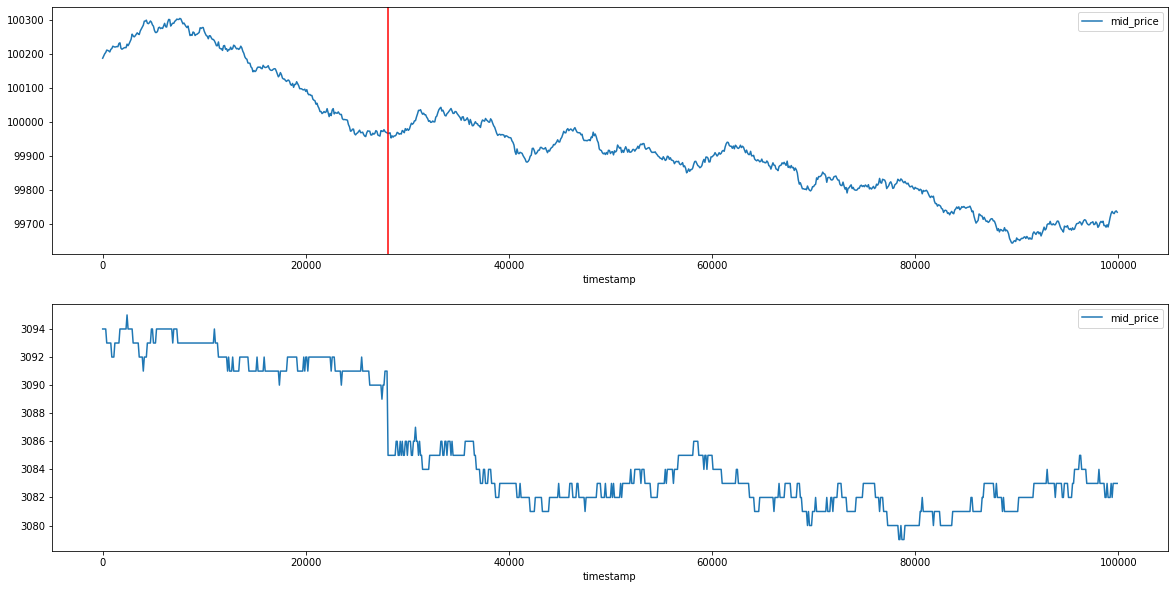

In [11]:
#plot the graph of mid_price of diving gear vertically stacked on the graph of mid_price of dolphin sightings
fig, ax = plt.subplots(2,1)
dolphinSightings.plot(x="timestamp", y="mid_price", ax=ax[1])
divingGear.plot(x="timestamp", y="mid_price", ax=ax[0])
#on ax1, plot a vertical line at timestamp 28100
ax[0].axvline(x=28100, color="red")


In [12]:
# repeat the same whole process with log2.csv
df2 = pd.read_csv('log2.csv', sep=';')
dolphinSightings2 = df2[df2["product"] == "DOLPHIN_SIGHTINGS"]
divingGear2 = df2[df2["product"] == "DIVING_GEAR"]
dolphinSightings2["delta"] = dolphinSightings2["mid_price"].diff()
dolphinSightings2["absDelta"] = dolphinSightings2["delta"].abs()
deltaSorted2 = dolphinSightings2.copy()
deltaSorted2 = deltaSorted2.sort_values(by="absDelta", ascending=False)
deltaSorted2.head(10)

C:\Users\jean\AppData\Local\Temp\ipykernel_8612\1259473554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolphinSightings2["delta"] = dolphinSightings2["mid_price"].diff()
C:\Users\jean\AppData\Local\Temp\ipykernel_8612\1259473554.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolphinSightings2["absDelta"] = dolphinSightings2["delta"].abs()


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,delta,absDelta
38088,3,544100,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3159.0,0.0,30.0,30.0
11546,3,164900,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3102.0,0.0,22.0,22.0
20642,3,294800,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111.0,0.0,7.0,7.0
1969,3,28100,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3085.0,0.0,-6.0,6.0
20988,3,299800,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3112.0,0.0,3.0,3.0
21525,3,307500,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111.0,0.0,2.0,2.0
11649,3,166400,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3100.0,0.0,-1.0,1.0
61063,3,872300,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3169.0,0.0,1.0,1.0
61060,3,872200,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3168.0,0.0,-1.0,1.0
32641,3,466300,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3114.0,0.0,-1.0,1.0


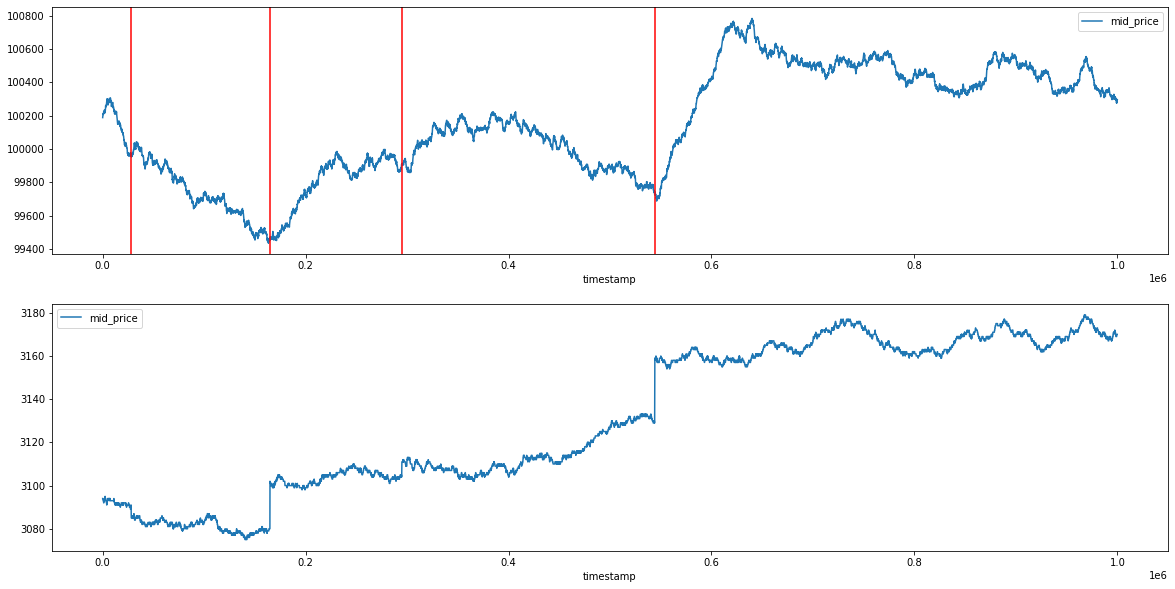

In [15]:
#make deltaSorted only contain the top 4 rows
deltaSorted2 = deltaSorted2.head(4)
#plot the graph of mid_price of diving gear vertically stacked on the graph of mid_price of dolphin sightings
fig, ax = plt.subplots(2,1)
dolphinSightings2.plot(x="timestamp", y="mid_price", ax=ax[1])
divingGear2.plot(x="timestamp", y="mid_price", ax=ax[0])
#on ax1, plot a vertical line at the timestamp of each of the top 4 rows in deltaSorted
for index, row in deltaSorted2.iterrows():
    ax[0].axvline(x=row["timestamp"], color="red")